In [1023]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [1024]:
_ = "Not_used"

In [1025]:
import torch
from pathlib import Path
import numpy as np
from lib.open_set.load_emb import load_embeddings


EEGNet embeddings

In [1026]:
path = Path("/Users/hrakol/projects/diploma_thesis/data/embeddings")

In [1027]:
load_path = path / ("train_embeddings.pt")
train = load_embeddings(load_path)
load_path = path / ("val_embeddings.pt")
val = load_embeddings(load_path)
load_path = path / ("test_embeddings.pt")
test = load_embeddings(load_path)
load_path = path / ("impostor_embeddings.pt")
imp = load_embeddings(load_path)

In [1028]:
import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(train[0])


/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



array([[ 3.90050673e+00,  2.93156832e-01],
       [ 3.81773901e+00, -5.71629882e-01],
       [ 3.86765170e+00,  2.33133227e-01],
       [ 4.26398516e+00, -1.19010173e-01],
       [ 3.40793133e+00,  3.87673900e-02],
       [ 4.15018702e+00, -1.84567589e-02],
       [ 4.03530550e+00, -4.93934095e-01],
       [ 3.98239279e+00,  6.83455681e-03],
       [ 4.11579323e+00,  2.35323414e-01],
       [ 2.57165074e+00, -3.15343916e-01],
       [ 4.05576611e+00,  1.00798301e-01],
       [ 4.30467033e+00,  6.86043575e-02],
       [ 4.42995548e+00, -1.93127641e-03],
       [ 3.68220687e+00, -8.69989302e-03],
       [ 3.79109788e+00,  4.44221854e-01],
       [ 3.14788795e+00,  1.80862471e-02],
       [-3.47133780e+00, -8.38543594e-01],
       [ 3.60209131e+00, -1.70039400e-01],
       [ 4.13576174e+00, -4.15149182e-01],
       [ 4.03134394e+00, -1.23693275e+00],
       [ 3.57564020e+00, -3.85259330e-01],
       [ 3.95316243e+00, -7.68812776e-01],
       [ 4.15800238e+00, -3.25611621e-01],
       [ 3.

In [1029]:
all_emb = torch.cat([train[0], val[0], test[0], imp[0]], dim = 0)
all_users = np.concatenate([train[1], val[1], test[1], imp[1]], axis = 0)
all_sessions = np.concatenate([train[2], val[2], test[2], imp[2]], axis = 0)

In [1030]:
emb_u = umap_model.transform(all_emb)
unique_sessions = np.unique(all_sessions)


/var/folders/py/jsk87j5502701w8fqb_j26l40000gn/T/ipykernel_25800/771449898.py:14: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/var/folders/py/jsk87j5502701w8fqb_j26l40000gn/T/ipykernel_25800/771449898.py:21: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



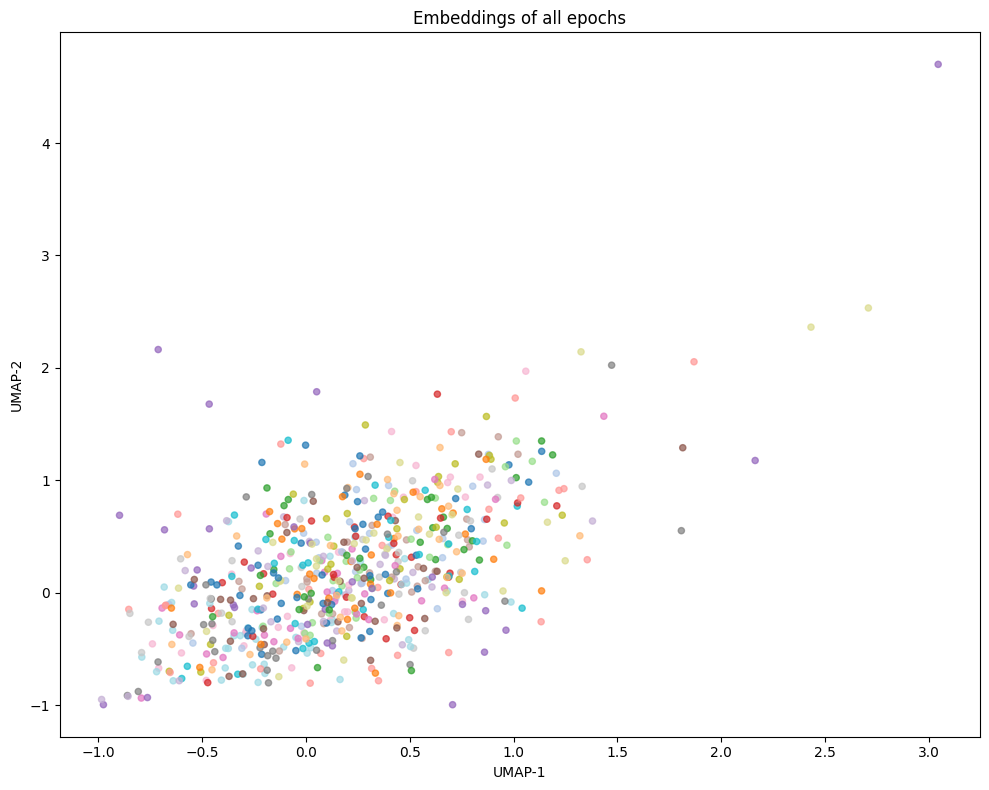

In [1031]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap("tab20", len(unique_sessions))

session_to_color = {
    s: cmap(i)
    for i, s in enumerate(unique_sessions)
}

colors = [session_to_color[s] for s in all_sessions]

plt.figure(figsize=(10, 8))

sc = plt.scatter(
    all_emb[:, 0], all_emb[:, 1],
    c = colors,
    cmap = "tab20",
    s = 20,
    alpha = 0.7
)
plt.legend(frameon=False)
plt.title("Embeddings of all epochs")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

In [1032]:
from lib.open_set.aggregate import aggregate_by_session

In [1033]:
emb_train_ses, y_train_ses, train_grp = aggregate_by_session(train[0], train[1], train[2])    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session(val[0], val[1], val[2])
emb_test_ses, y_test_ses, test_grp = aggregate_by_session(test[0], test[1], test[2])
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session(imp[0], imp[1], imp[2])

In [1034]:
group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



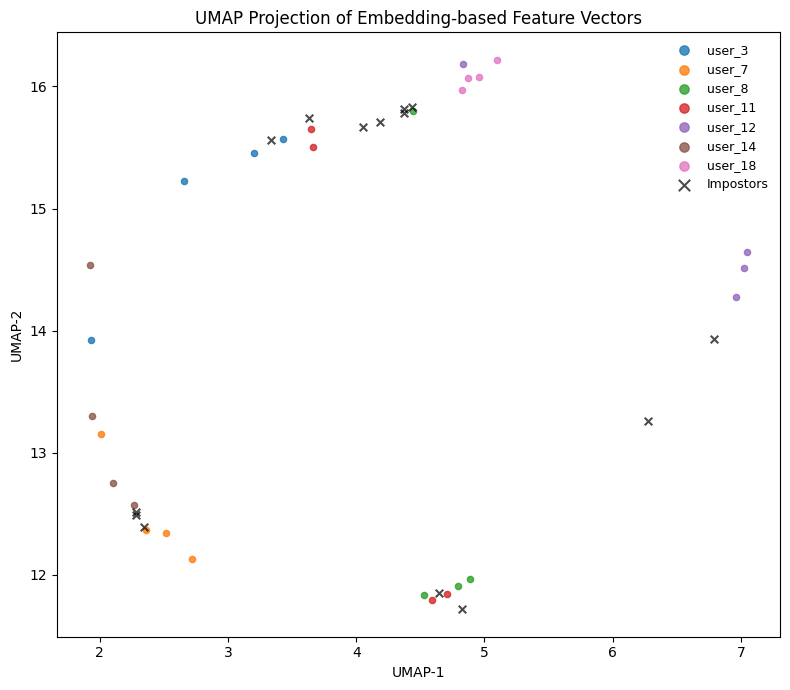

In [1035]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import umap

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim=0).cpu().numpy()

all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses], axis=0)

is_impostor = np.concatenate([
    np.zeros(len(y_train_ses)),
    np.zeros(len(y_val_ses)),
    np.zeros(len(y_test_ses)),
    np.ones(len(y_imp_ses))
]).astype(bool)

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",
    random_state = 19
)

umap_model.fit(emb_train_ses.cpu().numpy())

emb_u = umap_model.transform(all_emb)

plt.figure(figsize = (8, 7))

enrolled_users = np.unique(all_users[~is_impostor])
for u in enrolled_users:
    idx = (all_users == u) & (~is_impostor)
    plt.scatter(
        emb_u[idx, 0],
        emb_u[idx, 1],
        s = 20,
        alpha = 0.8,
        label = f"user_{int(u)}"
    )

plt.scatter(
    emb_u[is_impostor, 0],
    emb_u[is_impostor, 1],
    s = 30,
    c = "black",
    marker = "x",
    linewidths = 1.5,
    alpha = 0.7,
    label = "Impostors"
)

plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP Projection of Embedding-based Feature Vectors")
plt.legend(markerscale = 1.5, fontsize = 9, loc = "best", frameon = False)
plt.tight_layout()

#plt.savefig("umap_all_epochs.pdf")
plt.savefig("umap_eegnet.png", dpi = 600)
plt.show()

In [1036]:
from lib.utils.stimuli_labels import load_stim, select_seq, arrange_stim
import pandas as pd

stim_path = Path("/Users/hrakol/projects/diploma_thesis/data/stimuli_sequence")
split_path = Path("/Users/hrakol/projects/diploma_thesis/data/processed/split.csv")

stim_seq = load_stim(stim_path)
split_df = pd.read_csv(split_path)

In [1037]:
stim_seq_train = select_seq(stim_seq, split_df, "train")
train_freq = arrange_stim(stim_seq_train, train_grp)

stim_seq_val = select_seq(stim_seq, split_df, "val")
val_freq = arrange_stim(stim_seq_val, val_grp)

stim_seq_test = select_seq(stim_seq, split_df, "test")
test_freq = arrange_stim(stim_seq_test, test_grp)

stim_seq_imp = select_seq(stim_seq, split_df, "impostor")
imp_freq = arrange_stim(stim_seq_imp, imp_grp)

In [1038]:
from lib.open_set.aggregate import aggregate_by_session_per_freq
freq = 0

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train[0], train[1], train[2], train_freq, freq)        
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val[0], val[1], val[2], val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test[0], test[1], test[2], test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp[0], imp[1], imp[2], imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = emb_u[:, 0], 
        y = emb_u[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=500 Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [1039]:
from lib.open_set.aggregate import aggregate_by_session_per_freq
freq = 1

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train[0], train[1], train[2], train_freq, freq)        
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val[0], val[1], val[2], val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test[0], test[1], test[2], test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp[0], imp[1], imp[2], imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = emb_u[:, 0], 
        y = emb_u[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=2000 Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()


/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [1040]:
from lib.open_set.aggregate import aggregate_by_session_per_freq
freq = 2

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train[0], train[1], train[2], train_freq, freq)        
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val[0], val[1], val[2], val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test[0], test[1], test[2], test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp[0], imp[1], imp[2], imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = emb_u[:, 0], 
        y = emb_u[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=4000 Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()


/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



XGBOOST CLOSED SET

In [1041]:
from lib.utils.stimuli_labels import load_stim, select_seq, arrange_stim
import pandas as pd
from lib.open_set.z_score import z_score
from lib.train.dataset import load_dataset

stim_path = Path("/Users/hrakol/projects/diploma_thesis/data/stimuli_sequence")
split_path = Path("/Users/hrakol/projects/diploma_thesis/data/processed/split.csv")

stim_seq = load_stim(stim_path)
split_df = pd.read_csv(split_path)

stim_seq_train = select_seq(stim_seq, split_df, "train")
train_freq = arrange_stim(stim_seq_train, train_grp)

stim_seq_val = select_seq(stim_seq, split_df, "val")
val_freq = arrange_stim(stim_seq_val, val_grp)

stim_seq_test = select_seq(stim_seq, split_df, "test")
test_freq = arrange_stim(stim_seq_test, test_grp)

stim_seq_imp = select_seq(stim_seq, split_df, "impostor")
imp_freq = arrange_stim(stim_seq_imp, imp_grp)

In [1042]:
feature_path = Path("/Users/hrakol/projects/diploma_thesis/data/features")
model_type = "xgboost"

In [1043]:
train_emb, train_y, train_grp = load_dataset(split_df, _, feature_path, "train", model_type)
val_emb, val_y, val_grp = load_dataset(split_df, _, feature_path, "val", model_type)
test_emb, test_y, test_grp = load_dataset(split_df, _, feature_path, "test", model_type)
imp_emb, imp_y, imp_grp = load_dataset(split_df, _, feature_path, "impostor", model_type)

train_emb = torch.from_numpy(train_emb).float()
val_emb = torch.from_numpy(val_emb).float()
test_emb = torch.from_numpy(test_emb).float()
imp_emb = torch.from_numpy(imp_emb).float()

train_emb, val_emb, test_emb, imp_emb = z_score(train_emb, val_emb, test_emb, imp_emb)

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



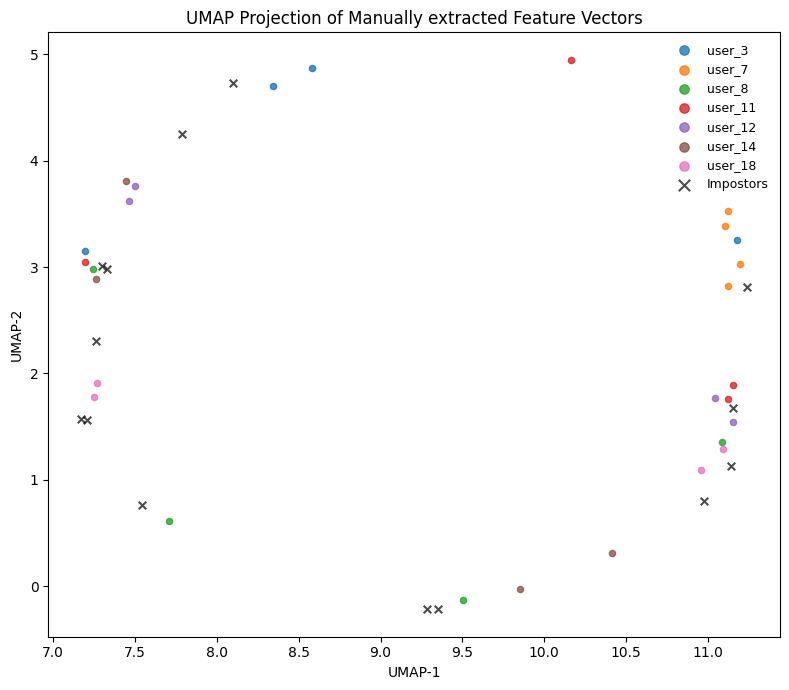

In [1044]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import umap

emb_train_ses, y_train_ses, train_grp = aggregate_by_session(train_emb, train_y, train_grp)    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session(val_emb, val_y, val_grp)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session(test_emb, test_y, test_grp)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session(imp_emb, imp_y, imp_grp)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)


all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim=0).cpu().numpy()

all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses], axis=0)

is_impostor = np.concatenate([
    np.zeros(len(y_train_ses)),
    np.zeros(len(y_val_ses)),
    np.zeros(len(y_test_ses)),
    np.ones(len(y_imp_ses))
]).astype(bool)

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",
    random_state = 19
)

umap_model.fit(emb_train_ses.cpu().numpy())

emb_u = umap_model.transform(all_emb)

plt.figure(figsize = (8, 7))

enrolled_users = np.unique(all_users[~is_impostor])
for u in enrolled_users:
    idx = (all_users == u) & (~is_impostor)
    plt.scatter(
        emb_u[idx, 0],
        emb_u[idx, 1],
        s = 20,
        alpha = 0.8,
        label = f"user_{int(u)}"
    )

plt.scatter(
    emb_u[is_impostor, 0],
    emb_u[is_impostor, 1],
    s = 30,
    c = "black",
    marker = "x",
    linewidths = 1.5,
    alpha = 0.7,
    label = "Impostors"
)

plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP Projection of Manually extracted Feature Vectors")
plt.legend(markerscale = 1.5, fontsize = 9, loc = "best", frameon = False)
plt.tight_layout()

#plt.savefig("umap_all_epochs.pdf")
plt.savefig("umap_xgboost.png", dpi = 600)
plt.show()

In [1045]:
train_emb, train_y, train_grp = load_dataset(split_df, _, feature_path, "train", model_type)
val_emb, val_y, val_grp = load_dataset(split_df, _, feature_path, "val", model_type)
test_emb, test_y, test_grp = load_dataset(split_df, _, feature_path, "test", model_type)
imp_emb, imp_y, imp_grp = load_dataset(split_df, _, feature_path, "impostor", model_type)

train_emb = torch.from_numpy(train_emb).float()
val_emb = torch.from_numpy(val_emb).float()
test_emb = torch.from_numpy(test_emb).float()
imp_emb = torch.from_numpy(imp_emb).float()

train_emb, val_emb, test_emb, imp_emb = z_score(train_emb, val_emb, test_emb, imp_emb)

freq = 0

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train_emb, train_y, train_grp, train_freq, freq)    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val_emb, val_y, val_grp, val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test_emb, test_y, test_grp, test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp_emb, imp_y, imp_grp, imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = emb_u[:, 0], 
        y = emb_u[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=500Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [1046]:
train_emb, train_y, train_grp = load_dataset(split_df, _, feature_path, "train", model_type)
val_emb, val_y, val_grp = load_dataset(split_df, _, feature_path, "val", model_type)
test_emb, test_y, test_grp = load_dataset(split_df, _, feature_path, "test", model_type)
imp_emb, imp_y, imp_grp = load_dataset(split_df, _, feature_path, "impostor", model_type)

train_emb = torch.from_numpy(train_emb).float()
val_emb = torch.from_numpy(val_emb).float()
test_emb = torch.from_numpy(test_emb).float()
imp_emb = torch.from_numpy(imp_emb).float()

train_emb, val_emb, test_emb, imp_emb = z_score(train_emb, val_emb, test_emb, imp_emb)

freq = 1

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train_emb, train_y, train_grp, train_freq, freq)    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val_emb, val_y, val_grp, val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test_emb, test_y, test_grp, test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp_emb, imp_y, imp_grp, imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = emb_u[:, 0], 
        y = emb_u[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=2000Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [1047]:
train_emb, train_y, train_grp = load_dataset(split_df, _, feature_path, "train", model_type)
val_emb, val_y, val_grp = load_dataset(split_df, _, feature_path, "val", model_type)
test_emb, test_y, test_grp = load_dataset(split_df, _, feature_path, "test", model_type)
imp_emb, imp_y, imp_grp = load_dataset(split_df, _, feature_path, "impostor", model_type)

train_emb = torch.from_numpy(train_emb).float()
val_emb = torch.from_numpy(val_emb).float()
test_emb = torch.from_numpy(test_emb).float()
imp_emb = torch.from_numpy(imp_emb).float()

train_emb, val_emb, test_emb, imp_emb = z_score(train_emb, val_emb, test_emb, imp_emb)

freq = 2

emb_train_ses, y_train_ses, train_grp = aggregate_by_session_per_freq(train_emb, train_y, train_grp, train_freq, freq)    
emb_val_ses, y_val_ses, val_grp = aggregate_by_session_per_freq(val_emb, val_y, val_grp, val_freq, freq)
emb_test_ses, y_test_ses, test_grp = aggregate_by_session_per_freq(test_emb, test_y, test_grp, test_freq, freq)
emb_imp_ses, y_imp_ses, imp_grp = aggregate_by_session_per_freq(imp_emb, imp_y, imp_grp, imp_freq, freq)

group = []
for i, j in zip(y_train_ses, train_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
train_grp = np.array(group)

group = []
for i, j in zip(y_val_ses, val_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
val_grp = np.array(group)

group = []
for i, j in zip(y_test_ses, test_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
test_grp = np.array(group)

group = []
for i, j in zip(y_imp_ses, imp_grp):
    if int(i) < 10:
        group.append(f"user_0{i}_session_{j}")
    else:
        group.append(f"user_{i}_session_{j}")
imp_grp = np.array(group)

all_emb = torch.cat([emb_train_ses, emb_val_ses, emb_test_ses, emb_imp_ses], dim = 0)
all_users = np.concatenate([y_train_ses, y_val_ses, y_test_ses, y_imp_ses],axis = 0)
all_sessions = np.concatenate([train_grp, val_grp, test_grp, imp_grp], axis = 0)

import umap

umap_model = umap.UMAP(
    n_neighbors = 15,
    min_dist = 0.1,
    n_components = 2,
    metric = "cosine",   
    random_state = 19
)

umap_model.fit_transform(emb_train_ses)
emb_u = umap_model.transform(all_emb)

import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Scatter(
        x = emb_u[:, 0], 
        y = emb_u[:, 1],
        mode = "markers",
        marker = dict(size = 10),
        text = all_sessions,         
        hoverinfo = "text"
    )
)

fig.update_layout(
    title = "Per Session Aggregated(Only f=4000Hz)",
    xaxis_title = "UMAP-1",
    yaxis_title = "UMAP-2",
)

fig.show()



/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/hrakol/Documents/GitHub/Diploma-Thesis/diploma_thesis/.venv/lib/python3.14/site-packages/umap/umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



NPZ(Result) files

Closed-Sets

In [1048]:
import numpy as np
from pathlib import Path

xgb_path = Path("/Users/hrakol/projects/diploma_thesis/results/xgboost_closed_set_metrics.npz")
xgb_path_0 = Path("/Users/hrakol/projects/diploma_thesis/results/xgboost_per_frequency/xgboost_closed_set_metrics_0.npz")
xgb_path_1 = Path("/Users/hrakol/projects/diploma_thesis/results/xgboost_per_frequency/xgboost_closed_set_metrics_1.npz")
xgb_path_2 = Path("/Users/hrakol/projects/diploma_thesis/results/xgboost_per_frequency/xgboost_closed_set_metrics_2.npz")

eegnet_path = Path("/Users/hrakol/projects/diploma_thesis/results/eegnet_closed_set_metrics.npz")
eegnet_path_0 = Path("/Users/hrakol/projects/diploma_thesis/results/eegnet_per_frequency/eegnet_closed_set_metrics_0.npz")
eegnet_path_1 = Path("/Users/hrakol/projects/diploma_thesis/results/eegnet_per_frequency/eegnet_closed_set_metrics_1.npz")
eegnet_path_2 = Path("/Users/hrakol/projects/diploma_thesis/results/eegnet_per_frequency/eegnet_closed_set_metrics_2.npz")

In [1049]:
xg_data = np.load(xgb_path)
xg_data_0 = np.load(xgb_path_0)
xg_data_1 = np.load(xgb_path_1)
xg_data_2 = np.load(xgb_path_2)

eegnet_data = np.load(eegnet_path)
eegnet_data_0 = np.load(eegnet_path_0)
eegnet_data_1 = np.load(eegnet_path_1)
eegnet_data_2 = np.load(eegnet_path_2)

In [1050]:
eegnet_data.files

['accuracy',
 'precision',
 'recall',
 'f1',
 'y_true',
 'y_pred',
 'confusion_matrix',
 'model',
 'number_of_users',
 'chance']

In [1051]:
xg_data.files

['accuracy',
 'precision',
 'recall',
 'f1',
 'y_true',
 'y_pred',
 'confusion_matrix',
 'model',
 'number_of_users',
 'chance']

In [1052]:
print(f"Accuracy: {eegnet_data["accuracy"]}")
print(f"Precision: {eegnet_data["precision"]}")
print(f"F1-score: {eegnet_data["f1"]}")
print(f"Confusion Matrix: \n{eegnet_data["confusion_matrix"]}")
print(f"Chance: {eegnet_data["chance"]}")

Accuracy: 0.6
Precision: 0.5684343434343434
F1-score: 0.5747227285936963
Confusion Matrix: 
[[ 7  4  3  0  0  1  0]
 [ 0  7  1  0  0  7  0]
 [ 1  0  1  2  7  0  4]
 [ 0  1  0 13  0  1  0]
 [ 0  0  0  0 15  0  0]
 [ 2  3  4  0  0  6  0]
 [ 0  0  0  0  0  1 14]]
Chance: 0.14285714285714285


In [1053]:
print(f"Accuracy: {xg_data["accuracy"]}")
print(f"Precision: {xg_data["precision"]}")
print(f"F1-score: {xg_data["f1"]}")
print(f"Confusion Matrix: \n{xg_data["confusion_matrix"]}")
print(f"Chance: {xg_data["chance"]}")

Accuracy: 0.7904761904761904
Precision: 0.7221006144393242
F1-score: 0.7384295368026084
Confusion Matrix: 
[[ 0  9  3  0  0  2  1]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  0  0 15  0  0]
 [ 0  7  0  0  0  8  0]
 [ 0  0  0  0  0  0 15]]
Chance: 0.14285714285714285


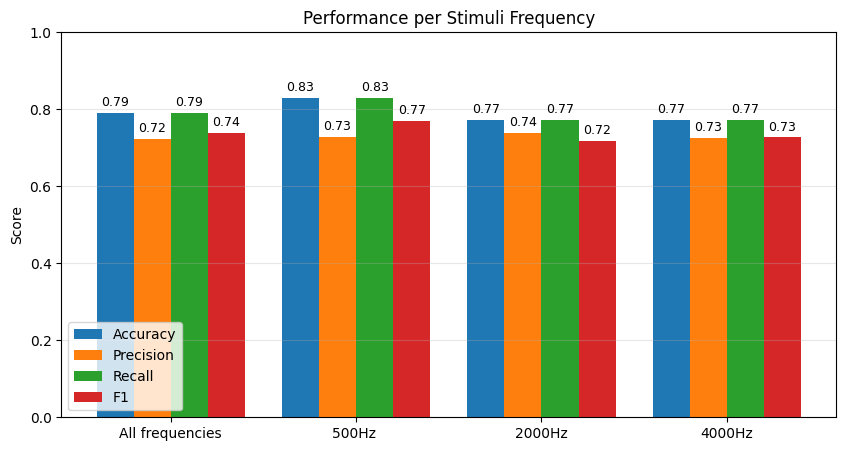

In [1054]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz ", "2000Hz", "4000Hz"]
metrics = ["Accuracy", "Precision", "Recall", "F1"]

scores = {
    "Accuracy": [xg_data["accuracy"], xg_data_0["accuracy"], xg_data_1["accuracy"], xg_data_2["accuracy"]],
    "Precision": [xg_data["precision"], xg_data_0["precision"], xg_data_1["precision"], xg_data_2["precision"]],
    "Recall": [xg_data["recall"], xg_data_0["recall"], xg_data_1["recall"], xg_data_2["recall"]],
    "F1": [xg_data["f1"], xg_data_0["f1"], xg_data_1["f1"], xg_data_2["f1"]],
}

x = np.arange(len(modalities))
width = 0.2

plt.figure(figsize = (10,5))

for i, metric in enumerate(metrics):
    bars = plt.bar(
        x + i * width,
        scores[metric],
        width,
        label = metric
    )
    
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height:.2f}",
            ha = "center",
            va = "bottom",
            fontsize = 9
        )

plt.ylim(0, 1)
plt.xticks(x + 1.5 * width, modalities)
plt.ylabel("Score")
plt.title("Performance per Stimuli Frequency")
plt.legend()
plt.grid(axis = "y", alpha = 0.3)
plt.show()

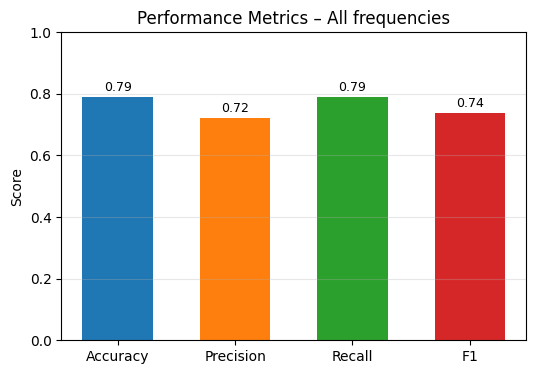

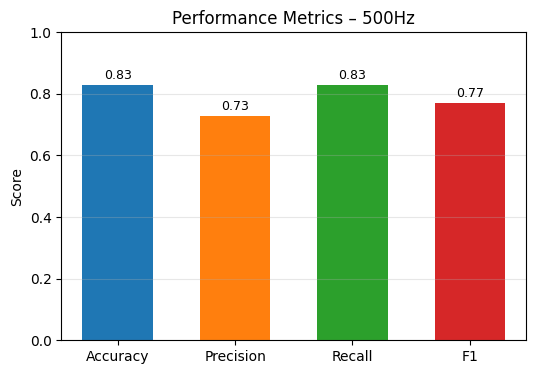

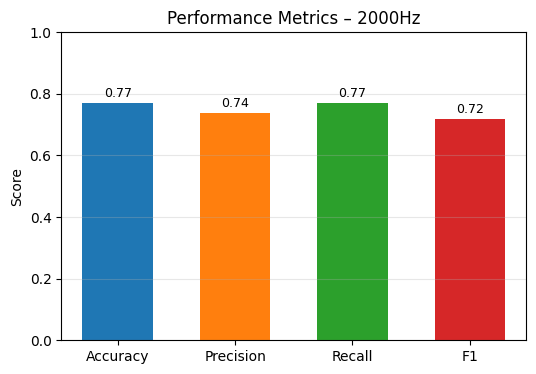

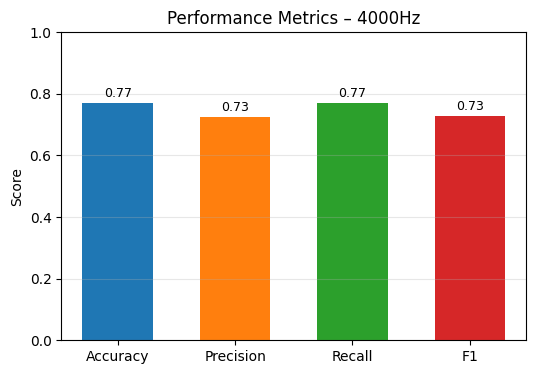

In [1055]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz", "2000Hz", "4000Hz"]
metrics = ["Accuracy", "Precision", "Recall", "F1"]

scores = {
    "Accuracy": [xg_data["accuracy"], xg_data_0["accuracy"], xg_data_1["accuracy"], xg_data_2["accuracy"]],
    "Precision": [xg_data["precision"], xg_data_0["precision"], xg_data_1["precision"], xg_data_2["precision"]],
    "Recall": [xg_data["recall"], xg_data_0["recall"], xg_data_1["recall"], xg_data_2["recall"]],
    "F1": [xg_data["f1"], xg_data_0["f1"], xg_data_1["f1"], xg_data_2["f1"]],
}

x = np.arange(len(metrics))
width = 0.6
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for i, modality in enumerate(modalities):
    plt.figure(figsize = (6, 4))

    modality_scores = [scores[m][i] for m in metrics]
    bars = plt.bar(x, modality_scores, width, color = colors)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height:.2f}",
            ha = "center",
            va = "bottom",
            fontsize = 9
        )

    plt.ylim(0, 1)
    plt.xticks(x, metrics)
    plt.ylabel("Score")
    plt.title(f"Performance Metrics – {modality}")
    plt.grid(axis = "y", alpha = 0.3)

    plt.show()

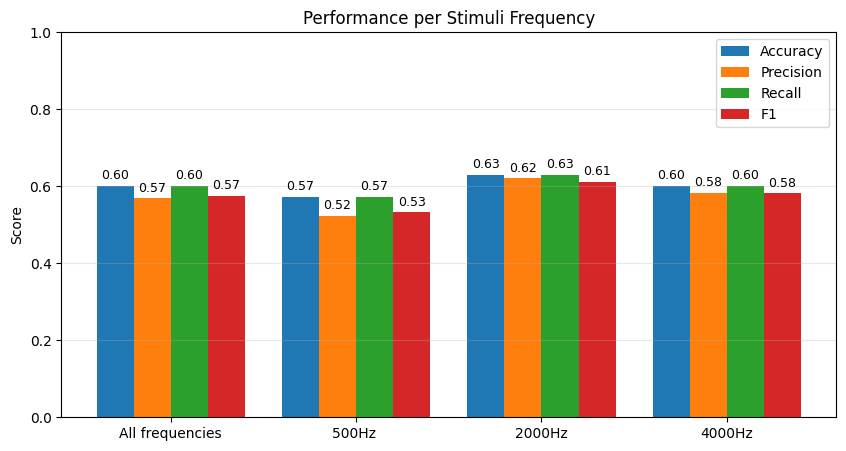

In [1056]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz ", "2000Hz", "4000Hz"]
metrics = ["Accuracy", "Precision", "Recall", "F1"]

scores = {
    "Accuracy": [eegnet_data["accuracy"], eegnet_data_0["accuracy"], eegnet_data_1["accuracy"], eegnet_data_2["accuracy"]],
    "Precision": [eegnet_data["precision"], eegnet_data_0["precision"], eegnet_data_1["precision"], eegnet_data_2["precision"]],
    "Recall": [eegnet_data["recall"], eegnet_data_0["recall"], eegnet_data_1["recall"], eegnet_data_2["recall"]],
    "F1": [eegnet_data["f1"], eegnet_data_0["f1"], eegnet_data_1["f1"], eegnet_data_2["f1"]],
}

x = np.arange(len(modalities))
width = 0.2

plt.figure(figsize = (10,5))

for i, metric in enumerate(metrics):
    bars = plt.bar(
        x + i * width,
        scores[metric],
        width,
        label = metric
    )
    
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height:.2f}",
            ha = "center",
            va = "bottom",
            fontsize = 9
        )

plt.ylim(0, 1)
plt.xticks(x + 1.5 * width, modalities)
plt.ylabel("Score")
plt.title("Performance per Stimuli Frequency")
plt.legend()
plt.grid(axis = "y", alpha = 0.3)
plt.show()

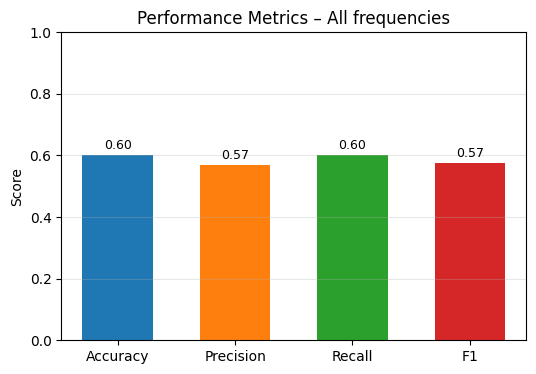

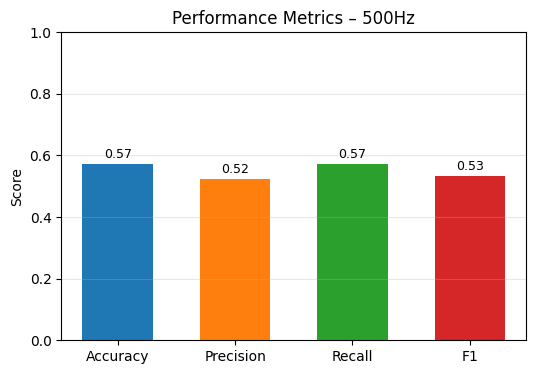

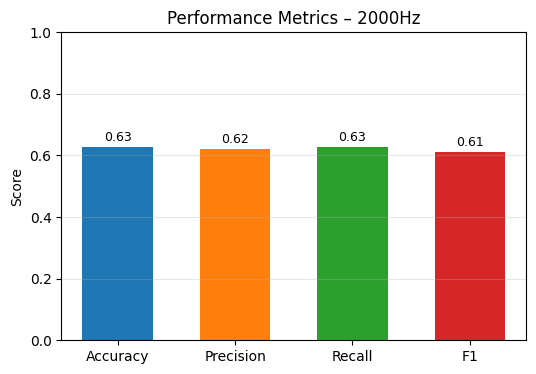

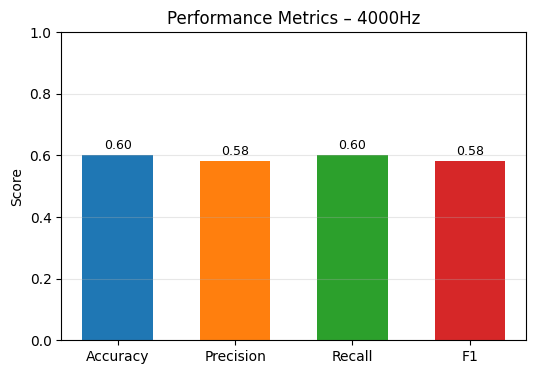

In [1057]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz", "2000Hz", "4000Hz"]
metrics = ["Accuracy", "Precision", "Recall", "F1"]

scores = {
    "Accuracy": [eegnet_data["accuracy"], eegnet_data_0["accuracy"], eegnet_data_1["accuracy"], eegnet_data_2["accuracy"]],
    "Precision": [eegnet_data["precision"], eegnet_data_0["precision"], eegnet_data_1["precision"], eegnet_data_2["precision"]],
    "Recall": [eegnet_data["recall"], eegnet_data_0["recall"], eegnet_data_1["recall"], eegnet_data_2["recall"]],
    "F1": [eegnet_data["f1"], eegnet_data_0["f1"], eegnet_data_1["f1"], eegnet_data_2["f1"]],
}

x = np.arange(len(metrics))
width = 0.6
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for i, modality in enumerate(modalities):
    plt.figure(figsize = (6, 4))

    modality_scores = [scores[m][i] for m in metrics]
    bars = plt.bar(x, modality_scores, width, color = colors)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height:.2f}",
            ha = "center",
            va = "bottom",
            fontsize = 9
        )

    plt.ylim(0, 1)
    plt.xticks(x, metrics)
    plt.ylabel("Score")
    plt.title(f"Performance Metrics – {modality}")
    plt.grid(axis = "y", alpha = 0.3)

    plt.show()

In [1058]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix_thesis(
    cm: np.ndarray,
    labels = None,
    title = "Row-normalised Confusion Matrix",
    decimals = 2,
    annotate = True,
    out_pdf = "confusion_matrix.pdf",
    out_png = "confusion_matrix.png",
    dpi = 600,
):
    cm = np.asarray(cm, dtype=float)
    n = cm.shape[0]

    if labels is None:
        labels = [f"U{i}" for i in range(1, n + 1)]

    # Figure size scales with number of users
    fig_w = max(5.5, 0.75 * n)
    fig_h = max(5.0, 0.75 * n)
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))

    # Grayscale colormap, fixed range [0, 1] for comparability
    im = ax.imshow(cm, vmin = 0, vmax = 1, cmap = "Greys", interpolation = "nearest")

    # Colorbar
    cbar = fig.colorbar(im, ax = ax, fraction = 0.046, pad = 0.04)
    cbar.set_label("Proportion", rotation = 90)

    # Axes, ticks, labels
    ax.set(
        xticks = np.arange(n),
        yticks = np.arange(n),
        xticklabels = labels,
        yticklabels = labels,
        xlabel = "Predicted User",
        ylabel = "True User",
        title = title,
    )
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")

    # Square cells + subtle grid
    ax.set_aspect("equal")
    ax.set_xticks(np.arange(-.5, n, 1), minor = True)
    ax.set_yticks(np.arange(-.5, n, 1), minor = True)
    ax.grid(which = "minor", linestyle = "-", linewidth = 0.5)
    ax.tick_params(which = "minor", bottom = False, left = False)

    # Annotate values
    if annotate:
        fmt = f"{{:.{decimals}f}}"
        for i in range(n):
            for j in range(n):
                val = cm[i, j]
                text_color = "white" if val > 0.5 else "black"
                ax.text(j, i, fmt.format(val), ha = "center", va = "center", color = text_color)

    fig.tight_layout()

    # Export
    if out_pdf:
        fig.savefig(out_pdf, bbox_inches = "tight")
    if out_png:
        fig.savefig(out_png, dpi = dpi, bbox_inches = "tight")

    plt.close(fig)


In [1059]:
plot_confusion_matrix_thesis(np.round(xg_data["confusion_matrix"] / 15.0, 2), labels=[f"user_{i}" for i in [8, 18, 11, 12, 14, 3, 7]])

In [1060]:
plot_confusion_matrix_thesis(np.round(eegnet_data["confusion_matrix"] / 15.0, 2), labels=[f"user_{i}" for i in [8, 18, 11, 12, 14, 3, 7]])

In [1061]:
print(np.round(xg_data["confusion_matrix"] / 15.0, 2))
print("\n")
print(np.round(eegnet_data["confusion_matrix"] / 15.0, 2))


[[0.   0.6  0.2  0.   0.   0.13 0.07]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.47 0.   0.   0.   0.53 0.  ]
 [0.   0.   0.   0.   0.   0.   1.  ]]


[[0.47 0.27 0.2  0.   0.   0.07 0.  ]
 [0.   0.47 0.07 0.   0.   0.47 0.  ]
 [0.07 0.   0.07 0.13 0.47 0.   0.27]
 [0.   0.07 0.   0.87 0.   0.07 0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]
 [0.13 0.2  0.27 0.   0.   0.4  0.  ]
 [0.   0.   0.   0.   0.   0.07 0.93]]


Open-Sets 

In [1062]:
import numpy as np
from pathlib import Path

xgb_path = Path("/Users/hrakol/projects/diploma_thesis/results/xgboost_open_set.npz")
xgb_path_0 = Path("/Users/hrakol/projects/diploma_thesis/results/xgboost_per_frequency/xgboost_open_set_0.npz")
xgb_path_1 = Path("/Users/hrakol/projects/diploma_thesis/results/xgboost_per_frequency/xgboost_open_set_1.npz")
xgb_path_2 = Path("/Users/hrakol/projects/diploma_thesis/results/xgboost_per_frequency/xgboost_open_set_2.npz")

eegnet_path = Path("/Users/hrakol/projects/diploma_thesis/results/eegnet_open_set.npz")
eegnet_path_0 = Path("/Users/hrakol/projects/diploma_thesis/results/eegnet_per_frequency/eegnet_open_set_0.npz")
eegnet_path_1 = Path("/Users/hrakol/projects/diploma_thesis/results/eegnet_per_frequency/eegnet_open_set_1.npz")
eegnet_path_2 = Path("/Users/hrakol/projects/diploma_thesis/results/eegnet_per_frequency/eegnet_open_set_2.npz")

In [1063]:
xg_data = np.load(xgb_path, allow_pickle = True)
xg_data_0 = np.load(xgb_path_0, allow_pickle = True)
xg_data_1 = np.load(xgb_path_1, allow_pickle = True)
xg_data_2 = np.load(xgb_path_2, allow_pickle = True)

eegnet_data = np.load(eegnet_path, allow_pickle = True)
eegnet_data_0 = np.load(eegnet_path_0, allow_pickle = True)
eegnet_data_1 = np.load(eegnet_path_1, allow_pickle = True)
eegnet_data_2 = np.load(eegnet_path_2, allow_pickle = True)

In [1064]:
eegnet_data.files

['acc_rate',
 'TP',
 'FN',
 'FP',
 'TN',
 'FAR',
 'FRR',
 'thresholds',
 'impostor_matches']

In [1065]:
xg_data.files

['acc_rate',
 'TP',
 'FN',
 'FP',
 'TN',
 'FAR',
 'FRR',
 'thresholds',
 'impostor_matches']

In [1066]:
print(f"acc_rate: {eegnet_data["acc_rate"]}")
print(f"True Positive: {eegnet_data["TP"]}")
print(f"False Negative: {eegnet_data["FN"]}")
print(f"False Positive: {eegnet_data["FP"]}")
print(f"True Negative: {eegnet_data["TN"]}")
print(f"Thresholds: \n{eegnet_data["thresholds"]}")
print(f"Impostor matches: \n{eegnet_data["impostor_matches"]}")

acc_rate: 0.7
True Positive: 1
False Negative: 1
False Positive: 2
True Negative: 10
Thresholds: 
{3: 0.6990375518798828, 7: 0.8978357911109924, 8: 0.6869715452194214, 11: 0.7772747278213501, 12: 0.8705927729606628, 14: 0.6776664853096008, 18: 0.899151623249054}
Impostor matches: 
{'user_2_session_1': [14], 'user_2_session_2': [14]}


In [1067]:
print(eegnet_data["FRR"])

0.5


In [1068]:
print(f"acc_rate: {xg_data["acc_rate"]}")
print(f"True Positive: {xg_data["TP"]}")
print(f"False Negative: {xg_data["FN"]}")
print(f"False Positive: {xg_data["FP"]}")
print(f"True Negative: {xg_data["TN"]}")
print(f"Thresholds: \n{xg_data["thresholds"]}")
print(f"Impostor matches: \n{xg_data["impostor_matches"]}")

acc_rate: 0.8
True Positive: 1
False Negative: 1
False Positive: 8
True Negative: 4
Thresholds: 
{3: 0.4136095345020294, 7: 0.6908630132675171, 8: 0.6040984392166138, 11: 0.7722123265266418, 12: 0.6261315941810608, 14: -0.1259211152791977, 18: 0.8180624842643738}
Impostor matches: 
{'user_2_session_1': [14], 'user_2_session_2': [14], 'user_15_session_2': [14], 'user_5_session_2': [14], 'user_5_session_1': [14], 'user_4_session_2': [14], 'user_4_session_1': [14], 'user_10_session_2': [14]}


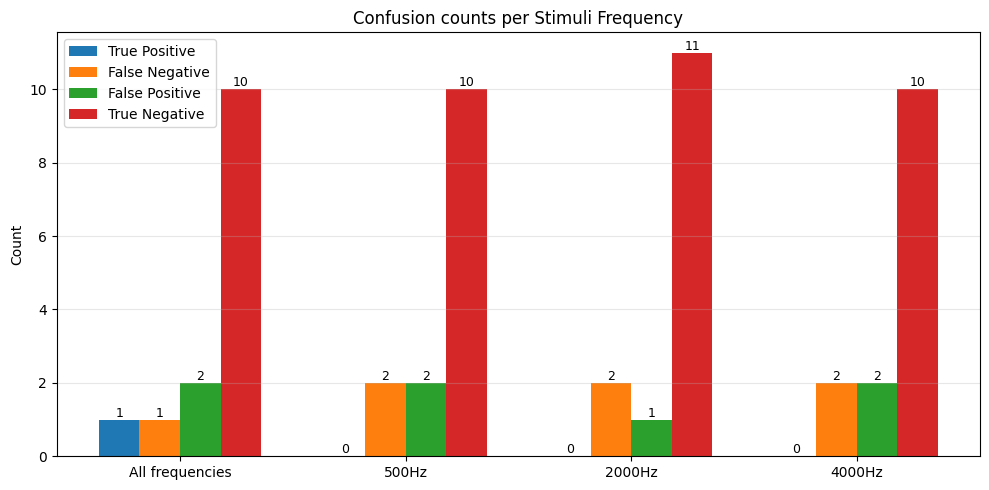

In [1069]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz", "2000Hz", "4000Hz"]
metrics = ["True Positive", "False Negative", "False Positive", "True Negative"]

scores = {
    "True Positive": [eegnet_data["TP"], eegnet_data_0["TP"], eegnet_data_1["TP"], eegnet_data_2["TP"]],
    "False Negative": [eegnet_data["FN"], eegnet_data_0["FN"], eegnet_data_1["FN"], eegnet_data_2["FN"]],
    "False Positive": [eegnet_data["FP"], eegnet_data_0["FP"], eegnet_data_1["FP"], eegnet_data_2["FP"]],
    "True Negative": [eegnet_data["TN"], eegnet_data_0["TN"], eegnet_data_1["TN"], eegnet_data_2["TN"]],
}

x = np.arange(len(modalities))
width = 0.18

plt.figure(figsize = (10,5))

for i, m in enumerate(metrics):
    vals = scores[m]
    bars = plt.bar(x + (i - (len(metrics) - 1) / 2) * width, vals, width, label = m)

    for bar, v in zip(bars, vals):
        plt.text(bar.get_x() + bar.get_width()/2, v, f"{int(v)}",
                 ha = "center", va = "bottom", fontsize = 9)

plt.xticks(x, modalities)
plt.ylabel("Count")
plt.title("Confusion counts per Stimuli Frequency")
plt.legend()
plt.grid(axis = "y", alpha = 0.3)
plt.tight_layout()
plt.show()


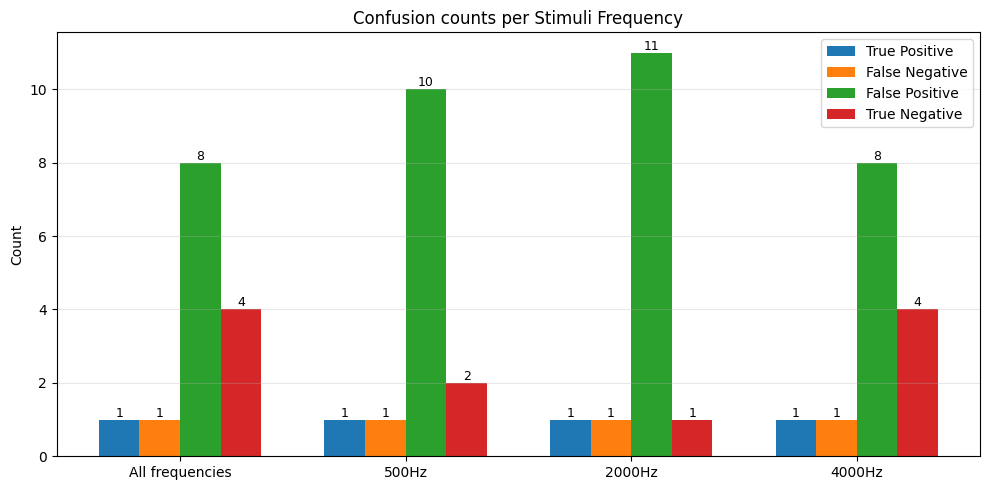

In [1070]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz", "2000Hz", "4000Hz"]
metrics = ["True Positive", "False Negative", "False Positive", "True Negative"]

scores = {
    "True Positive": [xg_data["TP"], xg_data_0["TP"], xg_data_1["TP"], xg_data_2["TP"]],
    "False Negative": [xg_data["FN"], xg_data_0["FN"], xg_data_1["FN"], xg_data_2["FN"]],
    "False Positive": [xg_data["FP"], xg_data_0["FP"], xg_data_1["FP"], xg_data_2["FP"]],
    "True Negative": [xg_data["TN"], xg_data_0["TN"], xg_data_1["TN"], xg_data_2["TN"]],
}

x = np.arange(len(modalities))
width = 0.18

plt.figure(figsize = (10,5))

for i, m in enumerate(metrics):
    vals = scores[m]
    bars = plt.bar(x + (i - (len(metrics) - 1) / 2) * width, vals, width, label = m)

    for bar, v in zip(bars, vals):
        plt.text(bar.get_x() + bar.get_width()/2, v, f"{int(v)}",
                 ha = "center", va = "bottom", fontsize = 9)

plt.xticks(x, modalities)
plt.ylabel("Count")
plt.title("Confusion counts per Stimuli Frequency")
plt.legend()
plt.grid(axis = "y", alpha = 0.3)
plt.tight_layout()
plt.show()


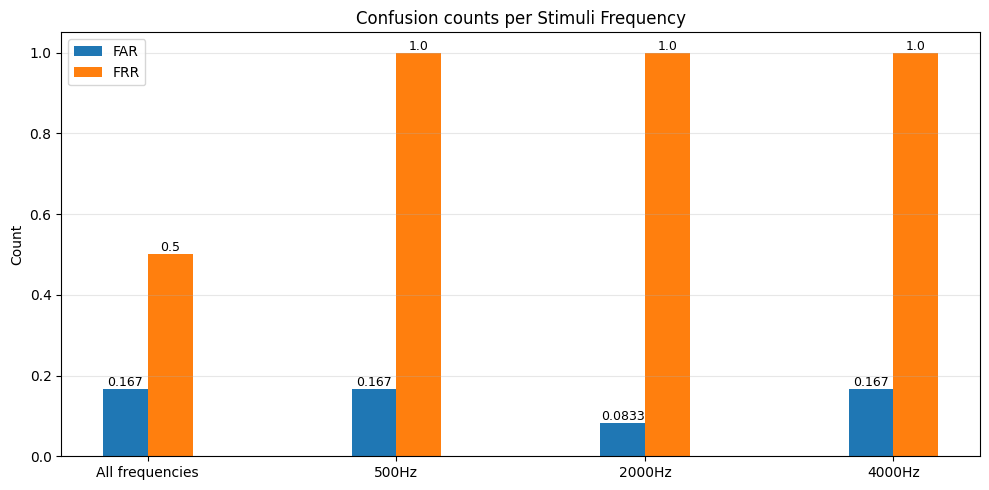

In [1071]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz", "2000Hz", "4000Hz"]
metrics = ["FAR", "FRR"]

scores = {
    "FAR": [eegnet_data["FAR"], eegnet_data_0["FAR"], eegnet_data_1["FAR"], eegnet_data_2["FAR"]],
    "FRR": [eegnet_data["FRR"], eegnet_data_0["FRR"], eegnet_data_1["FRR"], eegnet_data_2["FRR"]],
}

x = np.arange(len(modalities))
width = 0.18

plt.figure(figsize = (10,5))

for i, m in enumerate(metrics):
    vals = scores[m]
    bars = plt.bar(x + (i - (len(metrics) - 1) / 2) * width, vals, width, label = m)

    for bar, v in zip(bars, vals):
        plt.text(bar.get_x() + bar.get_width() / 2, v, f"{v:.3}",
                 ha = "center", va = "bottom", fontsize = 9)

plt.xticks(x, modalities)
plt.ylabel("Count")
plt.title("Confusion counts per Stimuli Frequency")
plt.legend()
plt.grid(axis = "y", alpha = 0.3)
plt.tight_layout()
plt.show()


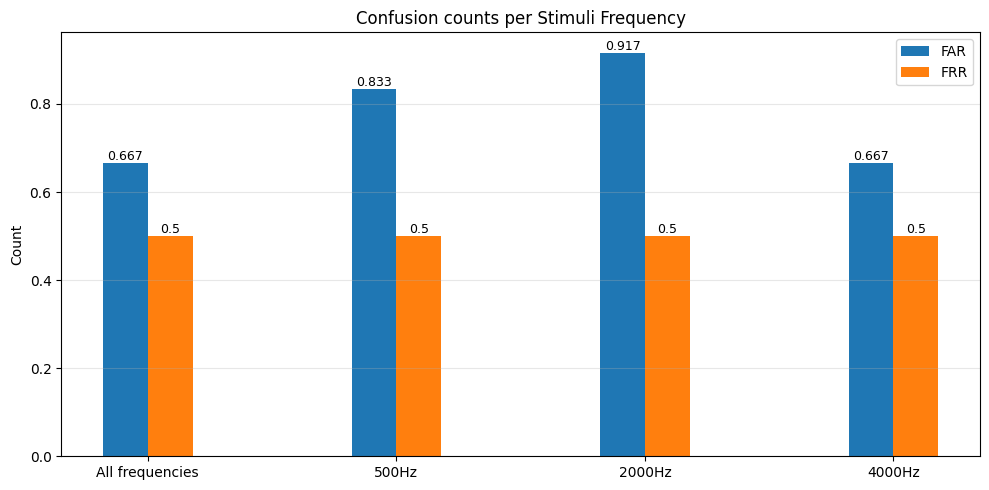

In [1072]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz", "2000Hz", "4000Hz"]
metrics = ["FAR", "FRR"]

scores = {
    "FAR": [xg_data["FAR"], xg_data_0["FAR"], xg_data_1["FAR"], xg_data_2["FAR"]],
    "FRR": [xg_data["FRR"], xg_data_0["FRR"], xg_data_1["FRR"], xg_data_2["FRR"]],
}

x = np.arange(len(modalities))
width = 0.18

plt.figure(figsize = (10,5))

for i, m in enumerate(metrics):
    vals = scores[m]
    bars = plt.bar(x + (i - (len(metrics) - 1) / 2) * width, vals, width, label = m)

    for bar, v in zip(bars, vals):
        plt.text(bar.get_x() + bar.get_width() / 2, v, f"{v:.3}",
                 ha = "center", va = "bottom", fontsize = 9)

plt.xticks(x, modalities)
plt.ylabel("Count")
plt.title("Confusion counts per Stimuli Frequency")
plt.legend()
plt.grid(axis = "y", alpha = 0.3)
plt.tight_layout()
plt.show()


In [1073]:
print(xg_data["impostor_matches"])
print(xg_data_0["impostor_matches"])
print(xg_data_1["impostor_matches"])
print(xg_data_2["impostor_matches"])

{'user_2_session_1': [14], 'user_2_session_2': [14], 'user_15_session_2': [14], 'user_5_session_2': [14], 'user_5_session_1': [14], 'user_4_session_2': [14], 'user_4_session_1': [14], 'user_10_session_2': [14]}
{'user_2_session_1': [14], 'user_2_session_2': [14], 'user_15_session_2': [14], 'user_5_session_2': [14], 'user_5_session_1': [14], 'user_13_session_2': [14], 'user_4_session_2': [14], 'user_13_session_1': [14], 'user_4_session_1': [14], 'user_10_session_2': [14]}
{'user_2_session_1': [14], 'user_15_session_1': [14], 'user_2_session_2': [14], 'user_15_session_2': [14], 'user_5_session_2': [14], 'user_5_session_1': [14], 'user_4_session_2': [14], 'user_13_session_1': [14], 'user_4_session_1': [14], 'user_10_session_1': [14], 'user_10_session_2': [14]}
{'user_2_session_1': [14], 'user_2_session_2': [14], 'user_15_session_2': [14], 'user_5_session_2': [14], 'user_5_session_1': [14], 'user_4_session_2': [14], 'user_4_session_1': [14], 'user_10_session_2': [14]}


In [1074]:
print(eegnet_data["impostor_matches"])
print(eegnet_data_0["impostor_matches"])
print(eegnet_data_1["impostor_matches"])
print(eegnet_data_2["impostor_matches"])

{'user_2_session_1': [14], 'user_2_session_2': [14]}
{'user_2_session_1': [7], 'user_2_session_2': [14]}
{'user_2_session_2': [8]}
{'user_2_session_1': [7], 'user_2_session_2': [7]}


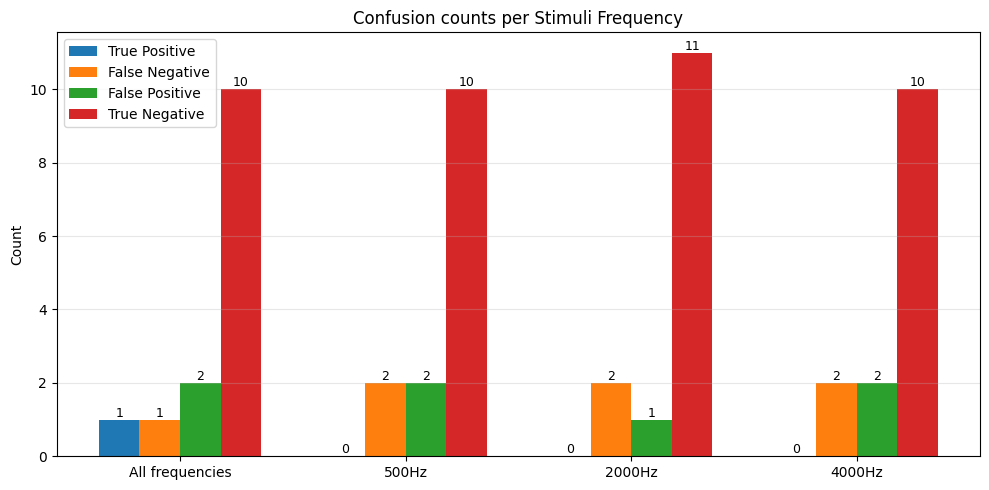

In [1075]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz", "2000Hz", "4000Hz"]
metrics = ["True Positive", "False Negative", "False Positive", "True Negative"]

scores = {
    "True Positive": [eegnet_data["TP"], eegnet_data_0["TP"], eegnet_data_1["TP"], eegnet_data_2["TP"]],
    "False Negative": [eegnet_data["FN"], eegnet_data_0["FN"], eegnet_data_1["FN"], eegnet_data_2["FN"]],
    "False Positive": [eegnet_data["FP"], eegnet_data_0["FP"], eegnet_data_1["FP"], eegnet_data_2["FP"]],
    "True Negative": [eegnet_data["TN"], eegnet_data_0["TN"], eegnet_data_1["TN"], eegnet_data_2["TN"]],
}

x = np.arange(len(modalities))
width = 0.18

plt.figure(figsize = (10,5))

for i, m in enumerate(metrics):
    vals = scores[m]
    bars = plt.bar(x + (i - (len(metrics) - 1) / 2) * width, vals, width, label = m)

    for bar, v in zip(bars, vals):
        plt.text(bar.get_x() + bar.get_width()/2, v, f"{int(v)}",
                 ha = "center", va = "bottom", fontsize = 9)

plt.xticks(x, modalities)
plt.ylabel("Count")
plt.title("Confusion counts per Stimuli Frequency")
plt.legend()
plt.grid(axis = "y", alpha = 0.3)
plt.tight_layout()
plt.show()


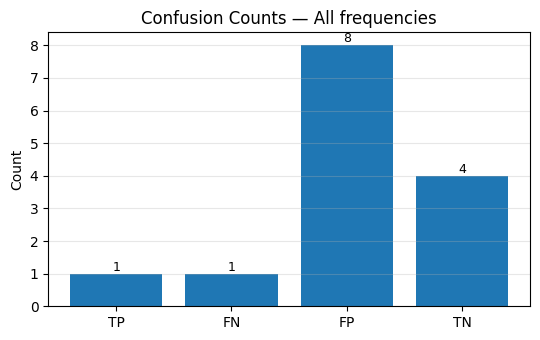

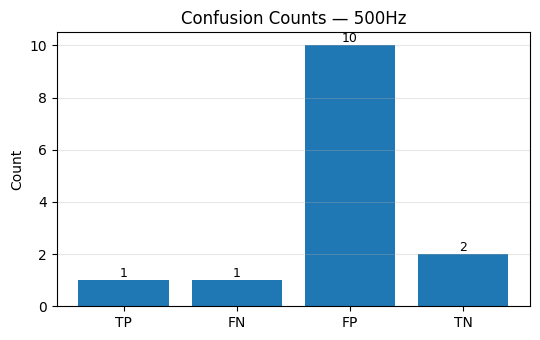

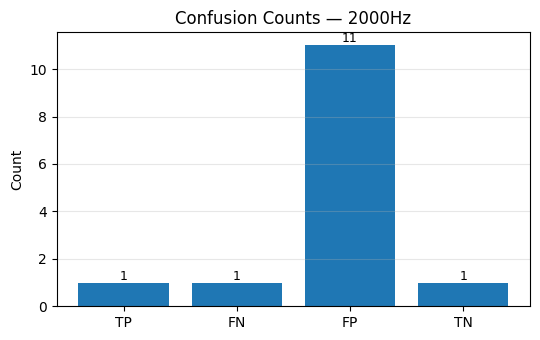

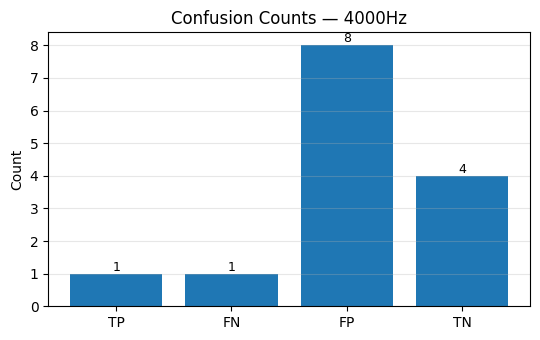

In [1076]:
import matplotlib.pyplot as plt
import numpy as np

modalities = ["All frequencies", "500Hz", "2000Hz", "4000Hz"]
sources = [xg_data, xg_data_0, xg_data_1, xg_data_2]
labels = ["TP", "FN", "FP", "TN"]

for modality, s in zip(modalities, sources):
    vals = [s["TP"], s["FN"], s["FP"], s["TN"]]

    plt.figure(figsize=(5.5, 3.5))
    bars = plt.bar(labels, vals)

    plt.ylabel("Count")
    plt.title(f"Confusion Counts — {modality}")
    plt.grid(axis="y", alpha=0.3)

    for bar, v in zip(bars, vals):
        plt.text(bar.get_x() + bar.get_width()/2, v, f"{int(v)}",
                 ha="center", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()